### Importações gerais

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, color
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
from skimage import data, filters
from ipywidgets import widgets
from scipy.ndimage import convolve
from skimage import exposure
from skimage.filters import threshold_mean


%matplotlib inline

# Funcao para plotar uma imagem qualquer
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()
    
def normaliza(img):
    p2, p98 = np.percentile(img, (0, 100))
    img_rescale = exposure.rescale_intensity(img, in_range=(0, 255))
    return img_rescale

def binariza(img):
    thresh = threshold_mean(out)
    binary = out > thresh
    show(binary)

def sobel3x3(img):
    
    sobel3x3y = np.array([[-1,-2,-1],
                          [0,0,0],
                          [1,2,1]])

    sobel3x3x = np.array([[-1,0,1],
                          [-2,0,2],
                          [-1,0,1]])
    
    
    sbimage = ndimage.convolve(ndimage.convolve(img, sobel3x3y, mode='mirror'), sobel3x3x, mode='mirror')
    
    return normaliza(sbimage)


# Filtragem Linear
===========================


## Filtros de suavização

Reduzem ruído de alta frequência, mas borram as bordas da imagem.

### Exemplo 1

Nesse exemplo, criamos máscaras com o numpy para realização de suavização. Filtros de média.


In [ ]:
from scipy import ndimage

s = (3,3)
k3x3 = 1/9 * np.ones(s)

s = (5,5)
k5x5 = 1/25 * np.ones(s)

s = (7,7)
k7x7 = 1/49 * np.ones(s)

image = skimage.img_as_float(io.imread("mineirao.jpg"))
#image = skimage.img_as_float(io.imread("arara.png"))
#show(image)

image = color.rgb2gray(image)       # Convert the image to grayscale (1 channel)
#show(image)

print(k3x3)
out = ndimage.convolve(image, k3x3, mode='mirror')
show(out)
#show(sobel3x3(out))

print(k5x5)
out = ndimage.convolve(image, k5x5, mode='mirror')
show(out)
#show(sobel3x3(out))


print(k7x7)
out = ndimage.convolve(image, k7x7, mode='mirror')
show(out)
#show(sobel3x3(out))



### Exemplo 2

Nesse exemplo, utilizamos o filtro da média com as implementações do próprio skimage.

In [ ]:
from skimage.morphology import disk


#image = data.camera()
image = skimage.img_as_float(io.imread("mineirao.jpg"))
image_gray = color.rgb2gray(image)      

show(image_gray)

#avg = skif.rank.mean(image_gray, skimage.morphology.disk(3))
avg = skif.rank.mean(image_gray, skimage.morphology.square(9))

show(avg)


### Exemplo 3

Nesse exemplo, utilizamos o filtro da gaussiana com as implementações do próprio skimage.


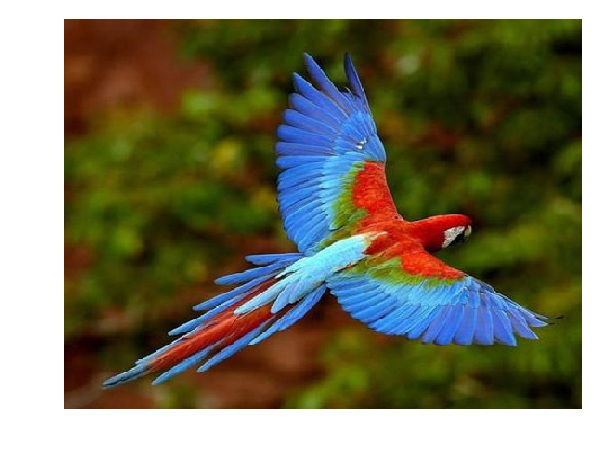

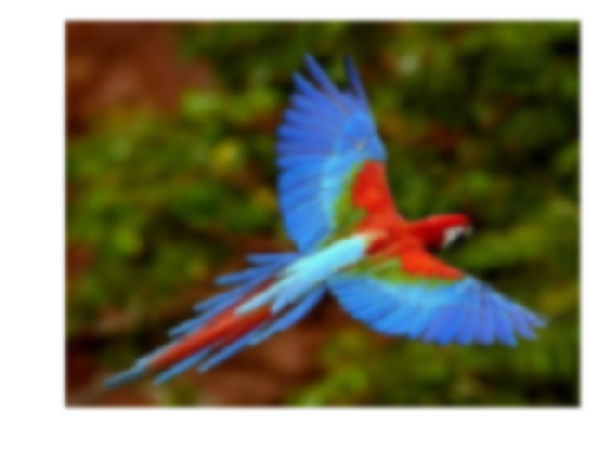

In [58]:
image = skimage.img_as_float(io.imread("arara.png"))

filtered_img = skif.gaussian(image, sigma=3, multichannel=True, mode='constant', cval=0.0)

show(image)
show(filtered_img)

## Filtros de Realce de Bordas

Destacam bordas da imagem em uma dada direcão, mas podem amplificar o ruído.

### Exemplo 1

Implementação dos filtros de Sobel com numpy.

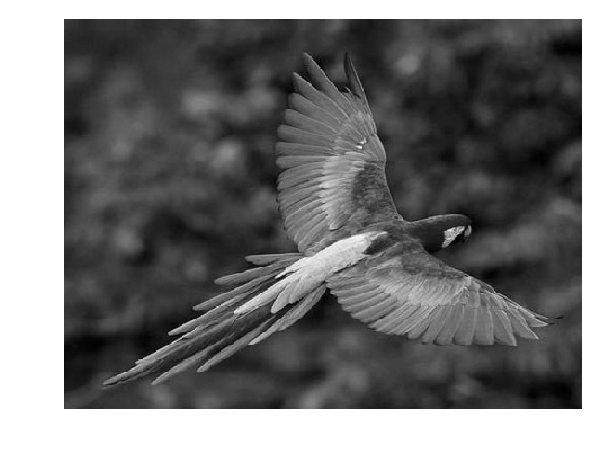

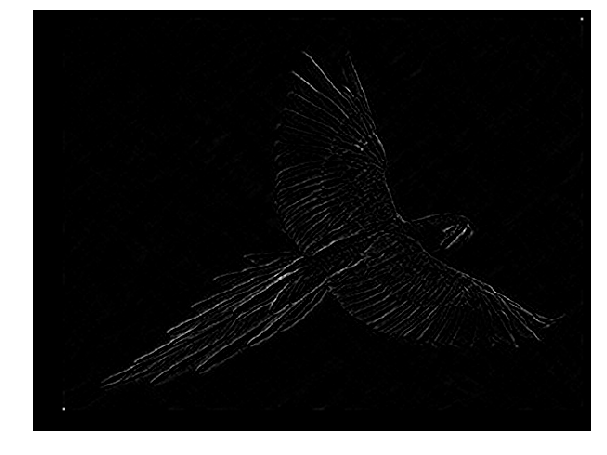

In [66]:
#image = skimage.img_as_float(io.imread("mineirao.jpg"))
image = skimage.img_as_float(io.imread("arara.png"))
#show(image)

image = color.rgb2gray(image)   
show(image)

show(sobel3x3(image))

### Exemplo 2

Uso de filtros de borda do skimage.

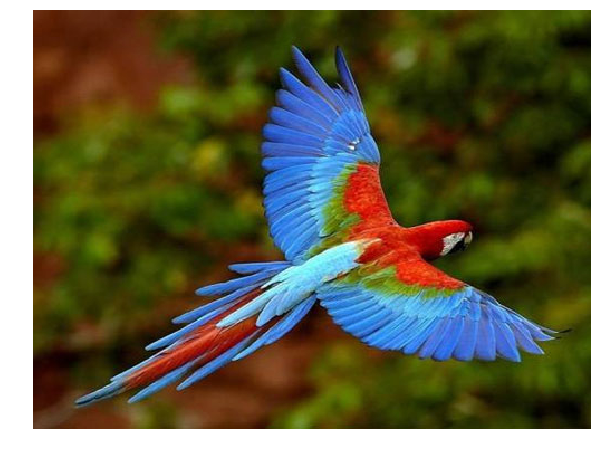

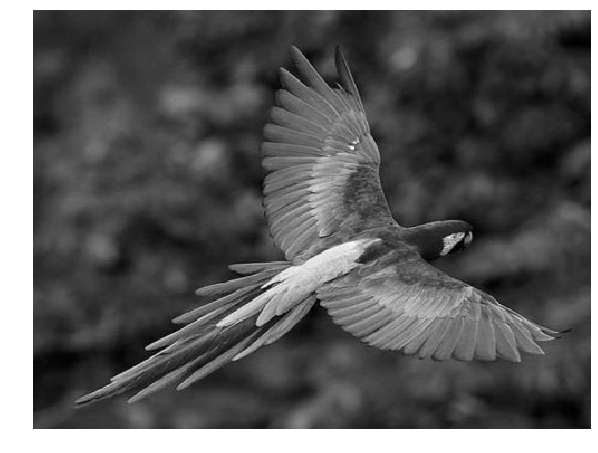

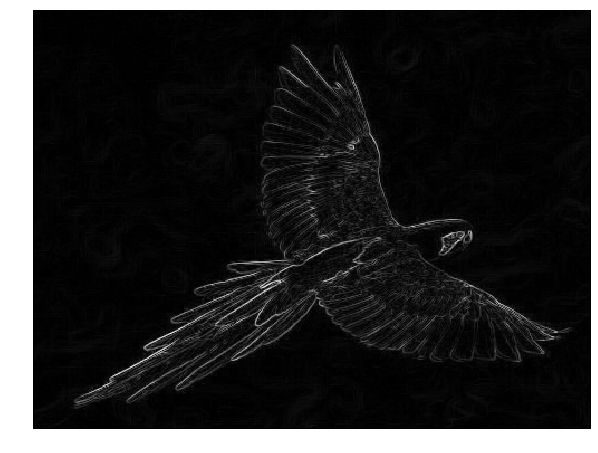

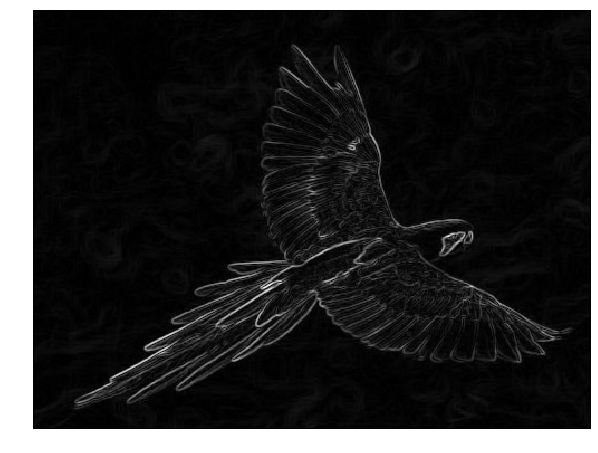

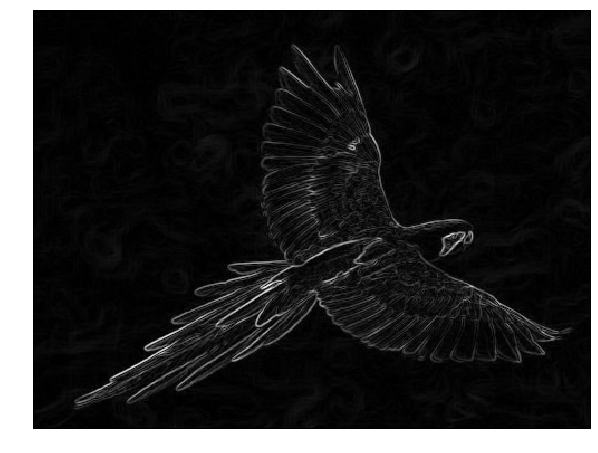

In [62]:

image = skimage.img_as_float(io.imread("arara1.jpg"))
#image = data.camera()
show(image)
image = color.rgb2gray(image)   
show(image)


bordas_roberts = skif.roberts(image)
show(bordas_roberts)

bordas_prewitt = skif.prewitt(image)
show(bordas_prewitt)

bordas_sobel = skif.sobel(image)
show(bordas_sobel)



### Exemplo 3

Implementação dos filtros de Sobel para imagens coloridas.

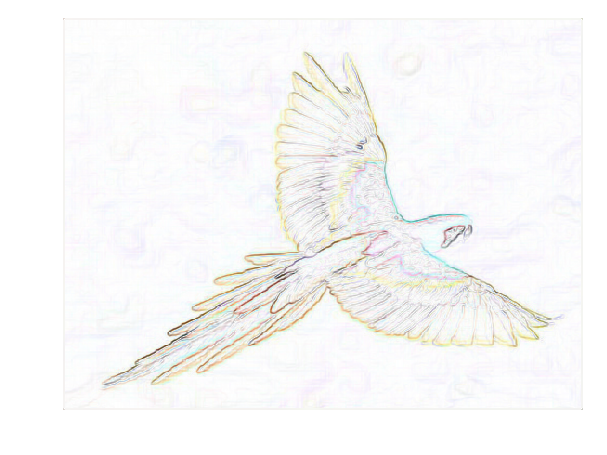

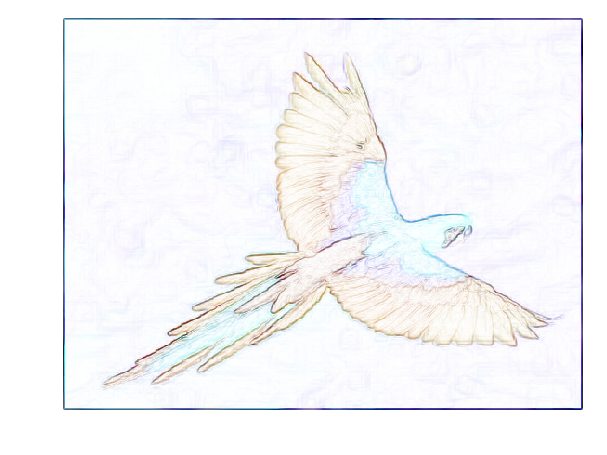

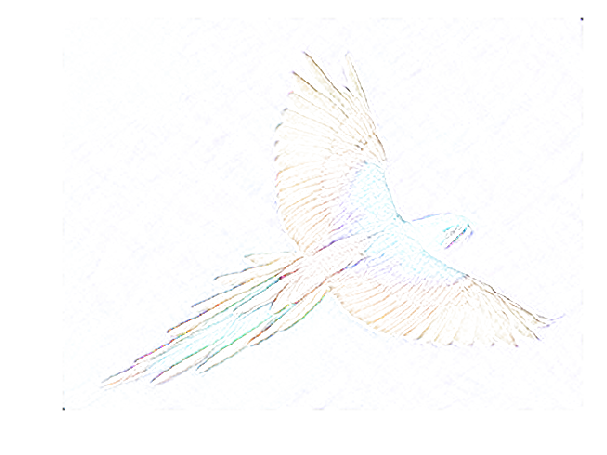

In [88]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters


@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)

@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return filters.sobel(image)

@adapt_rgb(hsv_value)
def mysobel(image):
    return sobel3x3(image)

image = skimage.img_as_float(io.imread("arara.png"))
#image = skimage.img_as_float(io.imread("mineirao.jpg"))

show(rescale_intensity(1 - sobel_each(image)))
show(rescale_intensity(1 - sobel_hsv(image)))
show(rescale_intensity(1 - mysobel(image)))



## Exercícios

1) Implemente e teste os filtros de realce de imagens vistos na aula (slide 31).



2) Utilize os códigos apresentados em aula para implementar as seguintes rotinas: (1) aplique 3 suavizações sucessivas a imagens usando filtros da média tamanho 7x7 e (2) aplique os filtros de sobel.

Quais são as principais diferenças com relação a aplicação direta dos filtros de sobel na imagem original? O que aconteceria se a imagem fosse ainda mais suavizada antes da detecção das bordas?